In [1]:
#Importando librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy
import scipy.stats
warnings.simplefilter("ignore", UserWarning)

In [2]:
#Extrallendo dataset
data = pd.read_csv("../datasets/200610COVID19MEXICO.csv")


In [3]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [4]:
data[["DIABETES", "FECHA_DEF"]].head(10)

,DIABETES,FECHA_DEF
0,1,9999-99-99
1,2,9999-99-99
2,2,9999-99-99
3,2,9999-99-99
4,2,9999-99-99
5,2,9999-99-99
6,2,9999-99-99
7,1,9999-99-99
8,2,9999-99-99
9,2,9999-99-99


1 -> Si

2 -> No

In [5]:
data["DIABETES"] = np.where(data["DIABETES"] == 1, "SI", data["DIABETES"])

In [6]:
data["DIABETES"] = np.where(data["DIABETES"] == 2, "NO", data["DIABETES"])

In [7]:
data["DIABETES"] = np.where(data["DIABETES"] == "2", "NO", data["DIABETES"])

In [8]:
data = data[["SEXO","TIPO_PACIENTE","FECHA_SINTOMAS", "FECHA_INGRESO", "FECHA_DEF", "INTUBADO", "EDAD","RESULTADO", "DIABETES", "EMBARAZO" ]]

In [9]:
data = data[data["DIABETES"]== "SI"]

In [10]:
data

,SEXO,TIPO_PACIENTE,FECHA_SINTOMAS,FECHA_INGRESO,FECHA_DEF,INTUBADO,EDAD,RESULTADO,DIABETES,EMBARAZO
0,2,1,2020-05-25,2020-05-27,9999-99-99,97,53,1,SI,97
7,1,2,2020-04-03,2020-04-03,9999-99-99,2,41,1,SI,2
11,1,2,2020-04-15,2020-04-15,2020-05-06,2,62,1,SI,2
14,2,2,2020-06-01,2020-06-06,9999-99-99,2,56,1,SI,97
15,2,2,2020-04-04,2020-04-04,2020-04-13,2,61,1,SI,97
...,...,...,...,...,...,...,...,...,...,...
369328,2,2,2020-05-15,2020-05-21,9999-99-99,2,62,3,SI,97
369339,1,2,2020-06-05,2020-06-07,9999-99-99,2,50,3,SI,2
369352,1,1,2020-05-17,2020-05-18,9999-99-99,97,44,3,SI,2
369353,2,1,2020-05-21,2020-05-23,9999-99-99,97,46,3,SI,97


In [11]:
data["SEXO"] = np.where(data["SEXO"] == 1, "MUJER", data["SEXO"])
data["SEXO"] = np.where(data["SEXO"] == 2, "HOMBRE", data["SEXO"])

In [12]:
data["SEXO"] = np.where(data["SEXO"] == "1", "MUJER", data["SEXO"])
data["SEXO"] = np.where(data["SEXO"] == "2", "HOMBRE", data["SEXO"])

In [13]:
data.columns

Index(['SEXO', 'TIPO_PACIENTE', 'FECHA_SINTOMAS', 'FECHA_INGRESO', 'FECHA_DEF',
       'INTUBADO', 'EDAD', 'RESULTADO', 'DIABETES', 'EMBARAZO'],
      dtype='object')

In [14]:
df = data[['SEXO', 'INTUBADO', 'EDAD', 'RESULTADO', 'EMBARAZO']]

# Estadistica de los datos

In [15]:
df["RESULTADO"] = np.where(df["RESULTADO"] == '1', "SI", df["RESULTADO"])
df["RESULTADO"] = np.where(df["RESULTADO"] == '2', "NO", df["RESULTADO"])
df["RESULTADO"] = np.where(df["RESULTADO"] == '3', "ND", df["RESULTADO"])

/home/carlos/anaconda3/envs/ambienteIA_1/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-15-6170d6d19e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RESULTADO"] = np.where(df["RESULTADO"] == '1', "SI", df["RESULTADO"])
<ipython-input-15-6170d6d19e03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RESULTADO"] 

In [16]:
df["EMBARAZO"] = np.where(df["EMBARAZO"] == '1', "SI", df["EMBARAZO"])
df["EMBARAZO"] = np.where(df["EMBARAZO"] == '2', "No", df["EMBARAZO"])
df["EMBARAZO"] = np.where(df["EMBARAZO"] == '98', "No", df["EMBARAZO"])
df["EMBARAZO"] = np.where(df["EMBARAZO"] == '97', "No", df["EMBARAZO"])


<ipython-input-16-2a0e19497ba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMBARAZO"] = np.where(df["EMBARAZO"] == '1', "SI", df["EMBARAZO"])
<ipython-input-16-2a0e19497ba6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EMBARAZO"] = np.where(df["EMBARAZO"] == '2', "No", df["EMBARAZO"])
<ipython-input-16-2a0e19497ba6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [17]:
df.head()

,SEXO,INTUBADO,EDAD,RESULTADO,EMBARAZO
0,HOMBRE,97,53,1,No
7,MUJER,2,41,1,No
11,MUJER,2,62,1,No
14,HOMBRE,2,56,1,No
15,HOMBRE,2,61,1,No


In [18]:
p_edad = df['EDAD'].values

In [19]:
#edad minima
np.min(p_edad)

0

In [20]:
#Edad promedio
np.mean(p_edad)

57.11199948417048

In [21]:
#Edad maxima
np.max(p_edad)

104

In [22]:
#Media de edad
np.median(p_edad)

57.0

In [23]:
#Moda
moda = np.nan

valores, conteo = np.unique(p_edad, return_counts=True)
pos = np.argmax(conteo)
moda = valores[pos]

In [24]:
moda

56

# Graficnado alguno datos

(array([   52.,   121.,  1243.,  4213., 10477., 14494.,  9575.,  5083.,
         1188.,    81.]),
 array([  0. ,  10.4,  20.8,  31.2,  41.6,  52. ,  62.4,  72.8,  83.2,
         93.6, 104. ]),
 <a list of 10 Patch objects>)

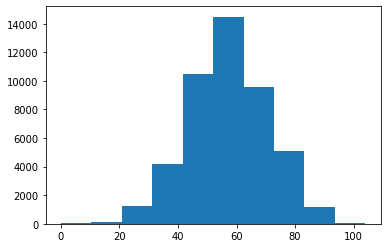

In [35]:
"""Edad"""
plt.hist(df.EDAD)

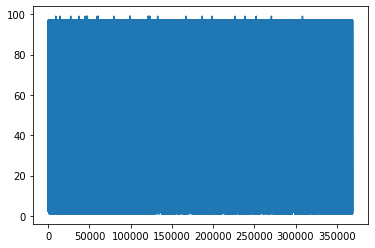

In [32]:
plt.plot(df.INTUBADO)